<a href="https://colab.research.google.com/github/Manikanta9391235355/G.Manikanta/blob/main/Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

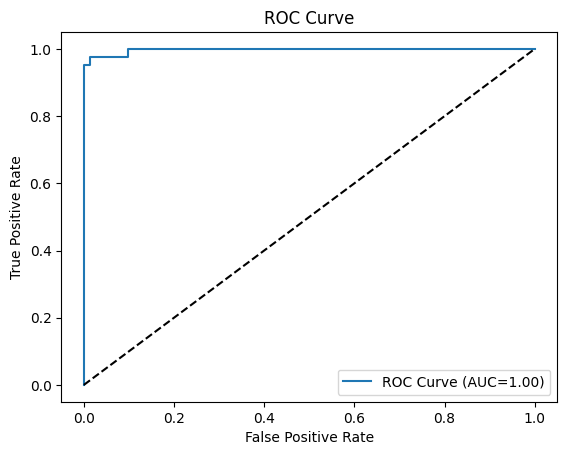

Precision (thresh=0.3): 0.91
Recall (thresh=0.3): 0.98


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    precision_score, recall_score, roc_curve, roc_auc_score
)


df = pd.read_csv("/content/data.csv")


print(df.head())

# Step 3: Separate features (X) and target (y)
# The target column is named "diagnosis" and we should drop the "Unnamed: 32" column
X = df.drop(columns=["diagnosis", "Unnamed: 32"])
y = df["diagnosis"]

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Fit Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Step 8: Evaluation
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, pos_label='M')
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label='M')
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Step 10: Threshold tuning example
threshold = 0.3
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

# Convert y_test to numerical for comparison with y_pred_thresh
y_test_numerical = y_test.apply(lambda x: 1 if x == 'M' else 0)


print(f"Precision (thresh={threshold}): {precision_score(y_test_numerical, y_pred_thresh):.2f}")
print(f"Recall (thresh={threshold}): {recall_score(y_test_numerical, y_pred_thresh):.2f}")